**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

In [3]:
df1.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
df1.shape

(3116945, 22)

In [5]:
df1.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
df2 = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

In [7]:
df2.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [8]:
df2.shape

(2077964, 21)

In [9]:
df2.columns

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

## Data Cleaning

**Handling Missing Values**

In [10]:
df1.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [11]:
df2.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

*Dropping of the Columns with more than 70-80% missing values*

In [12]:
# Define a threshold for dropping columns
threshold1 = 0.7 * len(df1)
threshold2 = 0.7 * len(df2)

# Drop columns with missing data exceeding the threshold
df1 = df1.dropna(thresh=threshold1, axis=1)
df2 = df2.dropna(thresh=threshold2, axis=1)

In [13]:
df1.shape

(3116945, 16)

In [14]:
df2.shape

(2077964, 15)

In [15]:
# Impute numerical features with the mean
for col in df1.select_dtypes(include=['float64', 'int64']).columns:
    df1[col] = df1[col].fillna(df1[col].mean())
    if col in df2.columns:  # Ensure the column exists in df2 before attempting to fill
        df2[col] = df2[col].fillna(df2[col].mean())

# Impute categorical features with the mode
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].fillna(df1[col].mode()[0])
    if col in df2.columns:  # Ensure the column exists in df2 before attempting to fill
        df2[col] = df2[col].fillna(df2[col].mode()[0])

In [16]:
df1.isnull().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [17]:
df2.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

## Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

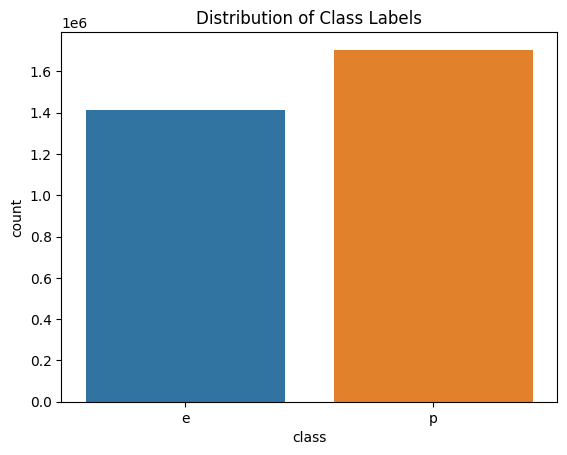

In [19]:
sns.countplot(x='class', data=df1)
plt.title('Distribution of Class Labels')
plt.show()

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3116945.0,1.558472e+06,899784.661737,0.00,779236.00,1558472.00,2337708.00,3116944.00
cap-diameter,3116945.0,6.309848e+00,4.657928,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333e+00,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,1.115379e+01,8.095477,0.00,4.97,9.65,15.63,102.90


**Box Plot :** To see the distribution of a categorical feature with respect to the target variable.

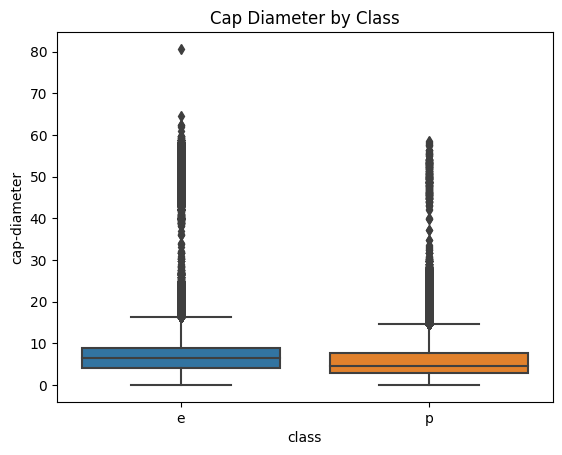

In [21]:
# Boxplot for cap-diameter grouped by class
sns.boxplot(x='class', y='cap-diameter', data=df1)
plt.title('Cap Diameter by Class')
plt.show()

**Violin Plot :** To visualize the distribution and probability density of the data at different levels of a categorical feature.

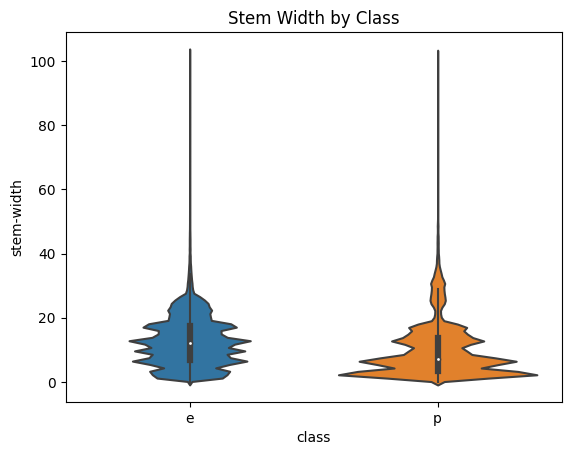

In [22]:
# Violin plot for stem-width
sns.violinplot(x='class', y='stem-width', data=df1)
plt.title('Stem Width by Class')
plt.show()

**Co-relation analysis :** Correlation analysis helps to identify relationships between numerical features

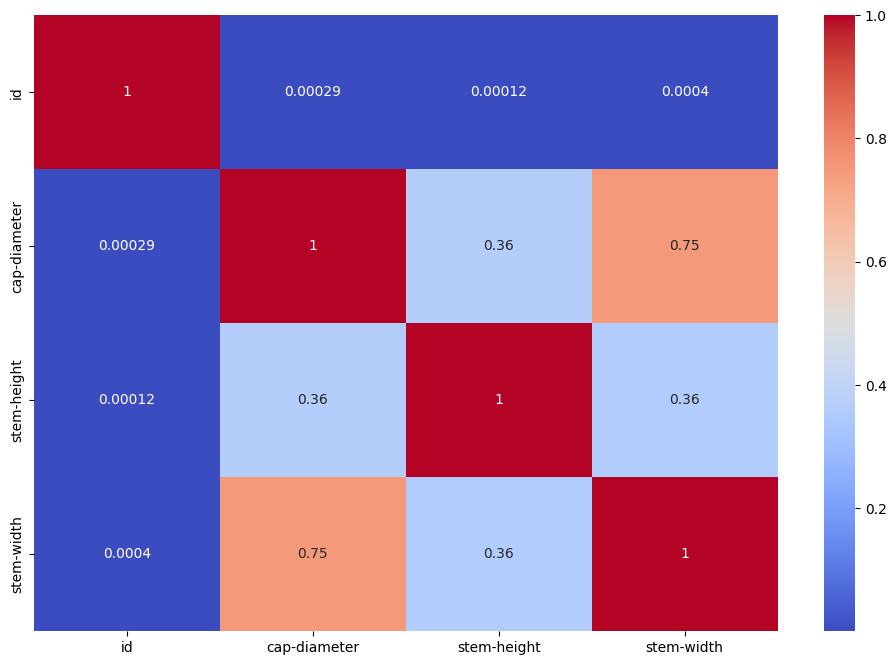

In [23]:
# Select only numeric columns
numeric_df1 = df1.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df1.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

> Convertion of Categorial Values into Numerical Values for Co relation Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
df1_encoded = df1.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Correlation matrix
corr = df1_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

*Identification of Out-liers using of Box Plot* 

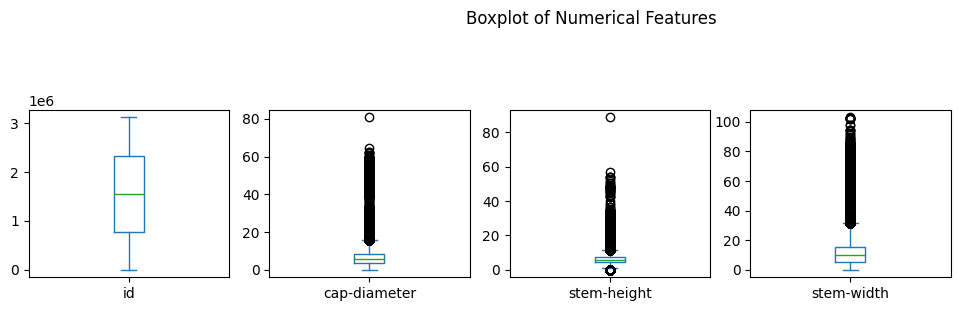

In [ ]:
# Boxplot for all numerical features
df1.plot(kind='box', subplots=True, layout=(4, 5), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Boxplot of Numerical Features')
plt.show()

# Scatter plot for a specific feature
sns.scatterplot(x='cap-diameter', y='stem-height', hue='class', data=df1)
plt.title('Cap Diameter vs Stem Height')
plt.show()

### Model 1

**Feature Engineering**


*Converting all categorical values into numerical values**

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df1.apply(LabelEncoder().fit_transform)

**Splitting the Dataset**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
1252551,1252551,221,67,79,63,20,47,46,189,523,46,5,18,25,0
1799166,1799166,146,48,55,64,8,44,46,438,224,46,5,18,37,0
1936146,1936146,485,71,59,64,8,52,61,634,695,43,5,18,37,0
1464811,1464811,415,53,76,76,8,70,61,487,1228,57,5,18,25,0
767639,767639,581,53,76,63,8,47,61,535,983,46,5,18,36,3


In [32]:
y_train.head()

1252551    1
1799166    1
1936146    1
1464811    1
767639     1
Name: class, dtype: int64

In [34]:
X_train.shape

(2493556, 15)

In [36]:
X_test.shape

(623389, 15)

**Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
rf_model = RandomForestClassifier(random_state=42)

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9888929705208145

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



**Model Evaluation**

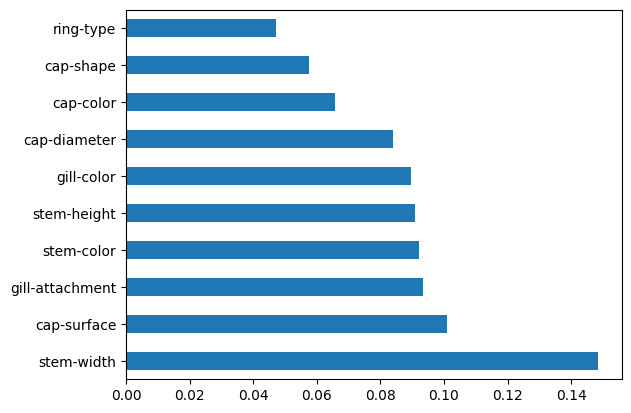

In [42]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


*Save the model*

In [44]:
import joblib

joblib.dump(rf_model, 'mushroom_classifier_model.pkl')

['mushroom_classifier_model.pkl']

*Load the model*

In [46]:
loaded_model = joblib.load('mushroom_classifier_model.pkl')

In [47]:
loaded_model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1])